# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models, regularizers
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import random


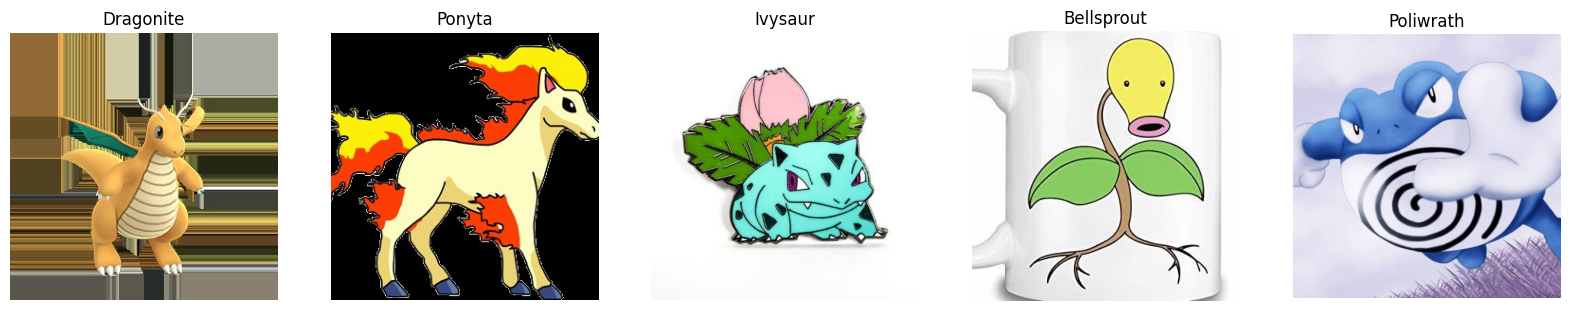

In [47]:
training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [56]:
# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)


#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])

# place training data into x and labels into y
y_train = np.array([poke_dict[x[0]] for x in dataset])
x_train = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_train, y_train))
random.shuffle(zipped)
x_train, y_train = zip(*zipped)
x_train, y_train = np.array(list(x_train)), np.array(list(y_train))

dataset = []
for poke_folder in os.listdir(testing_directory):
    for poke_img in os.listdir(testing_directory + '/' + poke_folder):
        img = resize_image(testing_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])

y_test = np.array([poke_dict[x[0]] for x in dataset])
x_test = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_test, y_test))
random.shuffle(zipped)
x_test, y_test = zip(*zipped)
x_test, y_test = np.array(list(x_test)), np.array(list(y_test))

x_test = x_test / 255.0
x_train = x_train / 255.0

# Flatten the image arrays for the MLP input
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)
# split data into training and testing
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Number of training data: 32632
Number of testing data: 1428


In [89]:



model = models.Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))



model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_34 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_104 (Dropout)       (None, 32, 32, 32)        0         
                                                                 
 conv2d_92 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_35 (Ba  (None, 32, 32, 64)      

In [90]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    batch_size= 256,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/20
128/128 [==============================] - 114s 873ms/step - loss: 8.1356 - accuracy: 0.1125 - val_loss: 6.0987 - val_accuracy: 0.0539
Epoch 2/20
128/128 [==============================] - 110s 861ms/step - loss: 3.6644 - accuracy: 0.3229 - val_loss: 4.8672 - val_accuracy: 0.1625
Epoch 3/20
128/128 [==============================] - 112s 872ms/step - loss: 3.1182 - accuracy: 0.4710 - val_loss: 3.7101 - val_accuracy: 0.3641
Epoch 4/20
128/128 [==============================] - 111s 866ms/step - loss: 2.9586 - accuracy: 0.5644 - val_loss: 3.1929 - val_accuracy: 0.5413
Epoch 5/20
128/128 [==============================] - 111s 868ms/step - loss: 2.8620 - accuracy: 0.6302 - val_loss: 2.8331 - val_accuracy: 0.6478
Epoch 6/20
128/128 [==============================] - 112s 873ms/step - loss: 2.7803 - accuracy: 0.6767 - val_loss: 2.8254 - val_accuracy: 0.6856
Epoch 7/20
128/128 [==============================] - 111s 868ms/step - loss: 2.6964 - accuracy: 0.7169 - val_loss: 2.8068 -

45/45 [==============================] - 1s 30ms/step


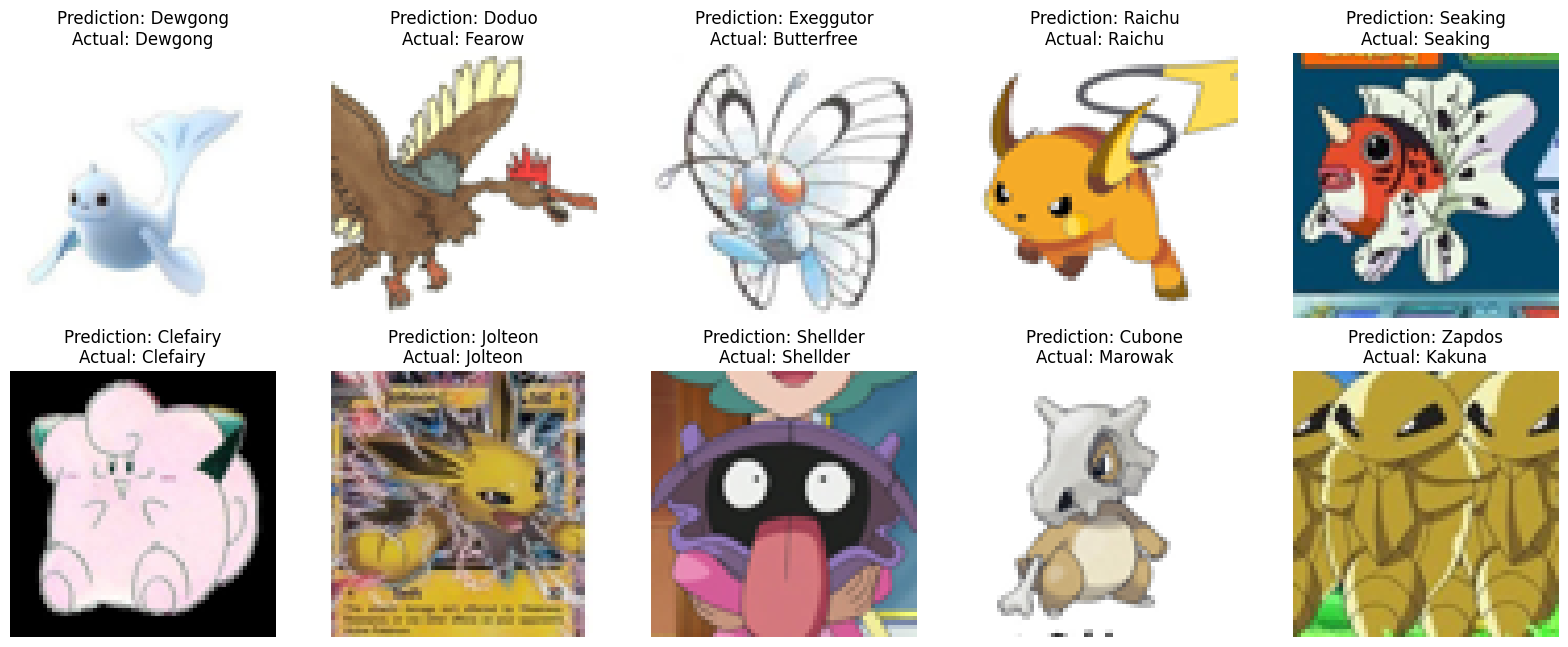

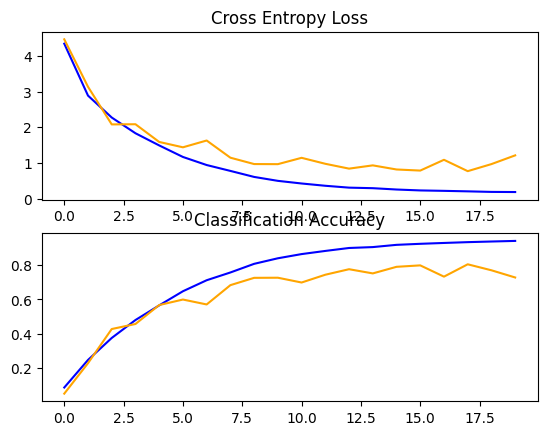

Accuracy for class: Abra         is 71.4 %
Accuracy for class: Aerodactyl   is 42.9 %
Accuracy for class: Alakazam     is 66.7 %
Accuracy for class: Alolan Sandslash is 55.6 %
Accuracy for class: Arbok        is 100.0 %
Accuracy for class: Arcanine     is 55.6 %
Accuracy for class: Articuno     is 55.6 %
Accuracy for class: Beedrill     is 100.0 %
Accuracy for class: Bellsprout   is 62.5 %
Accuracy for class: Blastoise    is 55.6 %
Accuracy for class: Bulbasaur    is 100.0 %
Accuracy for class: Butterfree   is 50.0 %
Accuracy for class: Caterpie     is 87.5 %
Accuracy for class: Chansey      is 77.8 %
Accuracy for class: Charizard    is 57.1 %
Accuracy for class: Charmander   is 81.8 %
Accuracy for class: Charmeleon   is 100.0 %
Accuracy for class: Clefable     is 100.0 %
Accuracy for class: Clefairy     is 90.0 %
Accuracy for class: Cloyster     is 80.0 %
Accuracy for class: Cubone       is 50.0 %
Accuracy for class: Dewgong      is 55.6 %
Accuracy for class: Diglett      is 87.5 %
Ac

In [70]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.show()

summarize_diagnostics(history)
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')

